## City Logistics Analysis ##

### Introduction ###

When it comes to automate an logistics pipeline, depending on the scale or the alogoritm being used, it's not always possible to request from google the time to go from a point to another for every pair of points. In this cases, an aproximation might be better suited. This analysis is the tool to get to this aproximation.

### What will be done ###

Loren ipsun

### Let's beggin! ###

In [240]:
#Import librarys
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime
import yaml

import warnings
warnings.filterwarnings("ignore")

#Open the config file
config = yaml.safe_load(open("config.yml"))

### Opening the location file ###
Let's start by opening the location being studied.
The next step is to visualize the region, to make sure that everithing opened alright and it's what we are looking for.

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

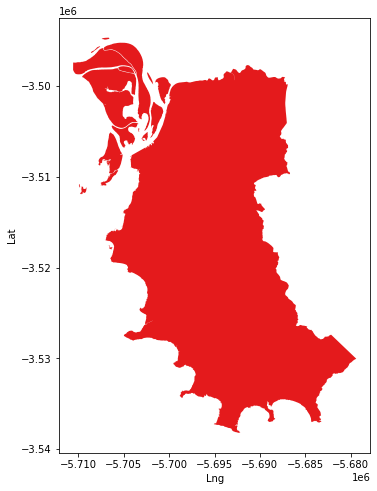

In [173]:
shape = gpd.read_file('shapefile')
plot = shape.plot(figsize=(8,8), markersize=10, cmap='Set1')
plot.set_ylabel('Lat')
plot.set_xlabel('Lng')
plot

### Points selecion ###
Now we will start selecting pairs of points inside the map to beggin testing route times.
The number of points, the gap as how the distances grow, as well as the maximum distance will all be defined by the configuration file ``` config.yml ``` and can be alternated to acomodate for the region. The number of pairs will be selected for every distance between 0 and max_distance, with the gap pre-set in the file.

In [244]:
#Config
n_pairs = config['number_pairs']
gap = config['gap']
max_dist = config['maximum_distance']
dist = gap

#DF that will store the pairs
pairs = pd.DataFrame()

min_x, min_y, max_x, max_y = shape.bounds['minx'], shape.bounds['miny'], shape.bounds['maxx'], shape.bounds['maxy']
start_time = datetime.now()
#For the number of times that the gap fits inside max_dist, there will be
for i in range(int(max_dist/gap)):
    j = 0
    while j < n_pairs:
        #Get randon point inside boundaries
        point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        point2 = Point(-99, -99)
        #Test if point is inside shape
        if(shape.contains(point)[0]):
            while(not (shape.contains(point2)[0])):
                point2 = Point(point.buffer(dist*100).exterior.coords[random.randint(0, len(list(point.buffer(dist*100).exterior.coords))-1)])
                pair = pd.DataFrame({"point1": [point], "point2": [point2], "distance": [dist]})
                pairs = pairs.append(pair, ignore_index=True)
            
            j += 1
        #Stop loop after a while. This is here so if there is a problem with the max distance being bigger than the size of the area
        time_delta = datetime.now() - start_time
        if time_delta.total_seconds() >= 50:
            break

    if time_delta.total_seconds() >= 90:
            break

    dist += gap

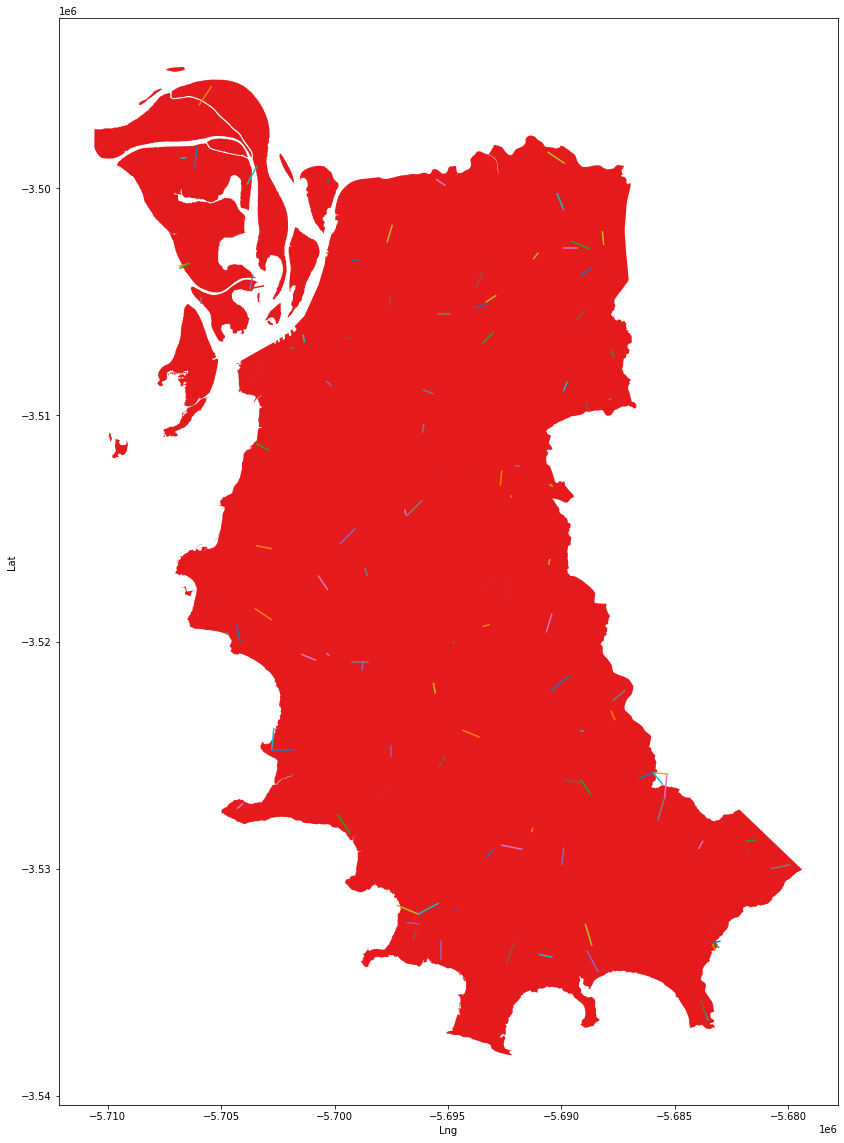

In [246]:
shape = gpd.read_file('shapefile')
plot = shape.plot(figsize=(20,20), markersize=10, cmap='Set1')
plot.set_ylabel('Lat')
plot.set_xlabel('Lng')
for index, row in pairs.iterrows():
    xs = [row['point1'].x, row['point2'].x]
    ys = [row['point1'].y, row['point2'].y]
    plt.plot(xs, ys)

plt.show()
